# Laboratorio 1 - Aprendizaje Automático

## Árboles y Random Forest para regresión y clasificación


* Fernando Palomino Cobo
* Mónica Hazeu
* Carles Serra
* Xavier Castilla

Importamos las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import tree

In [2]:
# Descargar dataset
!rm -rf /content/dataset-housing
!git clone https://github.com/carseven/dataset-housing.git
!!mv /content/dataset-housing/housing_train.csv /content
!rm -rf /content/dataset-housing

Cloning into 'dataset-housing'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


### Importamos el dataset en un DataFrame de pandas:

In [3]:
housing = pd.read_csv('housing_train.csv')

In [4]:
#para que se muestren todas las columnas en lugar de un resumen (se limita a 30 filas)
pd.set_option("display.max_rows", 30, "display.max_columns", None)

In [ ]:
#visualización del Dataframe
housing

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [ ]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Datos estadísticos de las variables numéricas:

In [ ]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Información sobre las variables categóricas:

In [ ]:
housing.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

Frecuencia de cada catogoría:

In [ ]:
housing_cat = housing.describe(include=['O']).columns #categorical columns

for column in housing_cat:
    print("\033[1m" + column + "\033[0m") #column in bold
    print(housing[column].value_counts(dropna = False)) #frequencies of categories
    print('\n')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     

In [ ]:
#comprobamos que están incluidas todas las columnas
print(len(housing.columns), ' = ', len(housing.describe().columns) + len(housing.describe(include=['O']).columns))

81  =  81


En el archivo de R se puede encontrar un análisis de la distribución de las variables. La representación de variables cualitativas se hará por medio de diagramas de barras y las variables cuantitativas por medio de histogramas.

---

### Encontramos las correlaciones entre variables

In [ ]:
correlation = housing.corr().abs() #matriz de correlación en valor absoluto

corr_unstack = correlation.unstack() #mostrar en forma de vector
corr_unstack[(corr_unstack>=0.75) & (corr_unstack<1)].sort_values(kind="quicksort", ascending=False).drop_duplicates() #mostrar valores por encima de 0.75

GarageArea    GarageCars     0.882475
GarageYrBlt   YearBuilt      0.825667
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
SalePrice     OverallQual    0.790982
dtype: float64

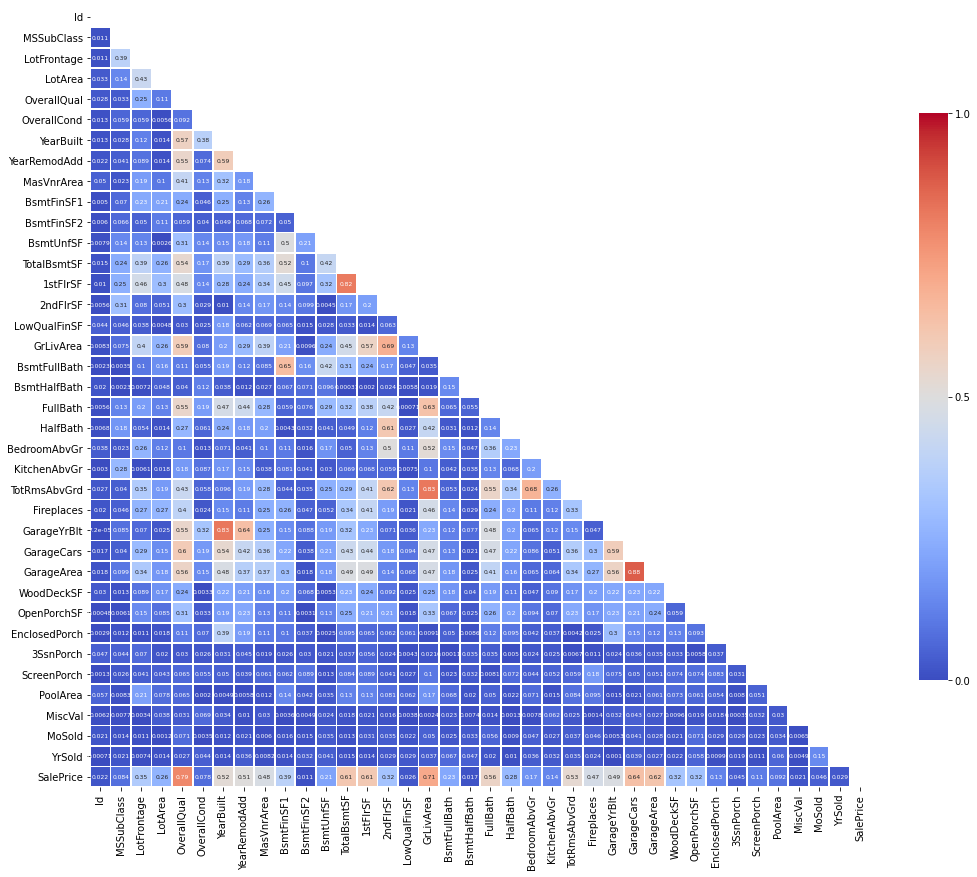

In [ ]:
#para ver gráficamente la matriz de correlación
mask = np.triu(np.ones(correlation.shape)).astype(np.bool)

f, ax = plt.subplots(figsize=(15, 20))

heatmap = sns.heatmap(
    correlation,
    mask=mask,
    square=True,
    linewidths=.8,
    linecolor='white',
    cmap='coolwarm',
    cbar_kws={'shrink': .4, 'ticks': [0, 0.5, 1]},
    vmin=0,
    vmax=1,
    annot=True,
    annot_kws={"size": 6}
)
ax.set_yticklabels(correlation.columns, rotation=0)
ax.set_xticklabels(correlation.columns, rotation=90)
plt.tight_layout()

__Análisis de variables:__
1. No se elimina GarageArea ni GarageCars. Aunque es cierto que la capacidad de coches depende del tamaño del garaje, la distribución del garaje puede hacer que, con los mismos pies cuadrados haya capacidad para una cantidad de coches distinta.
2. El garaje y la vivienda no tienen por qué estar construidos en el mismo año, por lo que se mantiene YearBuilt y GarageYrBlt
3. Una vez más, dependiendo de la distribución, puede que para los mismos pies cuadrados haya un mayor o menor número de habitaciones, por lo que se mantienen TotRmsAbvGrd y GrLivArea
4. Los pies cuadrados del sótano no dependen de los pies cuadrados del primer piso (1stFlrSF, TotalBsmtSF)
5. Se espera ver que OverallQual tenga un peso importante en la predicción de SalePrice, pero no se elimina porque no describen lo mismo

---

### Tratamiento de missing

In [5]:
#reemplazar infinitos por nan
housign = housing.replace([np.inf, -np.inf], np.nan)

In [6]:
#columnas con valores NAN en porcentaje
housing.isna().sum()[housing.isna().sum()>0] / len(housing) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Se eliminan todas las columnas donde los valores missing sean mayores que el 10%:

In [7]:
housing_clean = housing.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
housing_clean.isna().sum()[housing_clean.isna().sum()>0] / len(housing_clean) * 100

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

Se puede ver que para todas las variables relacionadas con el garaje hay la misma cantidad de NaN. Esto debe significar que estas casas no tienen garaje, por lo tanto se va a reemplazar los valores NaN por una nueva categoría llamada 'None':

In [8]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for column in garage_columns:
    housing_clean[column] = housing_clean[column].fillna("None")
    print(housing_clean[column].value_counts(dropna = False), '\n')

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

None      81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1933.0     1
1927.0     1
1908.0     1
1906.0     1
1900.0     1
Name: GarageYrBlt, Length: 98, dtype: int64 

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64 

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64 

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64 



Se puede ver que tanto MasVnrType como MasVnrArea también tienen la misma cantidad de NaN, por lo que podemos asumir, igualmente que estas casas no tienen mampostería, y se llenarán los valores missing de MasVnrType con 'None' y los valores de MasVnrArea con 0

In [9]:
housing_clean['MasVnrType'] = housing_clean['MasVnrType'].fillna("None")
print(housing_clean['MasVnrType'].value_counts(dropna = False), '\n')

housing_clean['MasVnrArea'] = housing_clean['MasVnrArea'].fillna(0)
print(housing_clean['MasVnrArea'].value_counts(dropna = False), '\n')

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64 



Vemos que la cantidad de None y 0 es distinta porque ya había valores None y valores 0 en el dataset

In [10]:
print(housing.MasVnrType.value_counts(dropna = False), '\n')
print(housing.MasVnrArea.value_counts(dropna = False), '\n')
print('Added values: ', round(0.547945*len(housing)/100))

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64 

0.0      861
72.0       8
180.0      8
NaN        8
108.0      8
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
621.0      1
Name: MasVnrArea, Length: 328, dtype: int64 

Added values:  8


En el caso del sótano, vemos que los valores missing no están en la misma cantidad. Además, se puede ver que otras variables relacionadas con el sótano no tienen valores missing, y su cantidad de valores 0 no es la misma:

In [11]:
print(len(housing_clean[housing_clean.BsmtFinSF1==0]))
print(len(housing_clean[housing_clean.BsmtFinSF2==0]))
print(len(housing_clean[housing_clean.BsmtUnfSF==0]))
print(len(housing_clean[housing_clean.TotalBsmtSF==0]))

467
1293
118
37


Por lo tanto, no se puede asumir que esas viviendas tengan sótano. Se llenarán por tanto estas variables categóricas None.

In [12]:
sotano_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for column in sotano_cat:
    housing_clean[column] = housing_clean[column].fillna("None")
    print(housing_clean[column].value_counts(dropna = False), '\n')

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64 

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64 

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64 

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64 

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64 



Para electrical, se llenarán los pocos valores missing con la moda de dicha variable, que es el valor: "SBrkr"

In [13]:
housing_clean.Electrical = housing_clean.Electrical.fillna("SBrkr") 

Como se puede ver, ya no quedan valores NaN

In [14]:
housing_clean.isna().sum()[housing_clean.isna().sum()>0] / len(housing_clean) * 100

Series([], dtype: float64)

---

Adicionalmente a este tratamiento, se va a eliminar la columna de Id, ya que es un valor de tipo "índice" y no tiene ninguna relevancia para el análisis. Aunque los árboles de decisión ignoran estos valores irrelevantes, se prefiere eliminarlo para que no tenga ningún efecto sobre el modelo.

In [15]:
housing_clean = housing_clean.drop(columns=['Id'])

---

# Regresión

Se van a analizar los datos usando tres métodos para tratar a las variables categóricas, que los árboles de decisión no pueden tratar sin un pre-procesado. Los métodos serán:


1.   One-Hot Encoding
2.   Label Encoding
3.   Ignorar las variables categóricas



## 1 One-Hot Encoding

### Preparación de los datos

One-hot encoding para las variables categóricas para permitir el uso de árboles

In [ ]:
housing_reg = pd.get_dummies(housing_clean)
housing_reg

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          196.0         706           0        150          856       856   
1            0.0         978           0        284         1262      1262   
2          162.0         486           0        434          920       920   
3            0.0         216           0        540          756       961   
4          350.0         655           0        490         1145      1145   
...          ...         ...         ...        ...          ...       ...   
1455         0.0           0           0        953          953       953   
1456       119.0         790         163        589         1542      2073   
1457         0.0         275           0        877         1152      1188   
1458         0.0          49        1029          0         1078      1078   
1459         0.0         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42 

Se separa entre variables predictoras y predichas

In [ ]:
X = housing_reg.drop(columns ="SalePrice")
y = housing_reg["SalePrice"]

Guardamos las etiquetas tanto de las columnas como los resultados esperados


In [ ]:
feature_names = X.columns
labels = y.unique()

In [ ]:
np.random.seed(123)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Árbol de decisión

In [ ]:
dt_oh = DecisionTreeRegressor(random_state=0) 
dtoh_params = {'max_depth':np.arange(1,100,2),'min_samples_leaf':np.arange(2,50)}

gs_dtoh = GridSearchCV(dt_oh,dtoh_params,cv=3)
gs_dtoh.fit(X_train,y_train)
best_params = gs_dtoh.best_params_

In [ ]:
# Entrenamos con los parámetros
dtr=DecisionTreeRegressor(max_depth=best_params["max_depth"], min_samples_leaf=best_params["min_samples_leaf"], random_state=0)
modelRTree = dtr.fit(X_train,y_train)
y_pred = modelRTree.predict(X_test)

In [ ]:
msle=mean_squared_log_error(y_test, y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))

RMLSE for the data: 0.21906126749358942
MAE: 27030.936008814264
MSE: 2145709762.5567272


Representamos graficamente el arbol creado

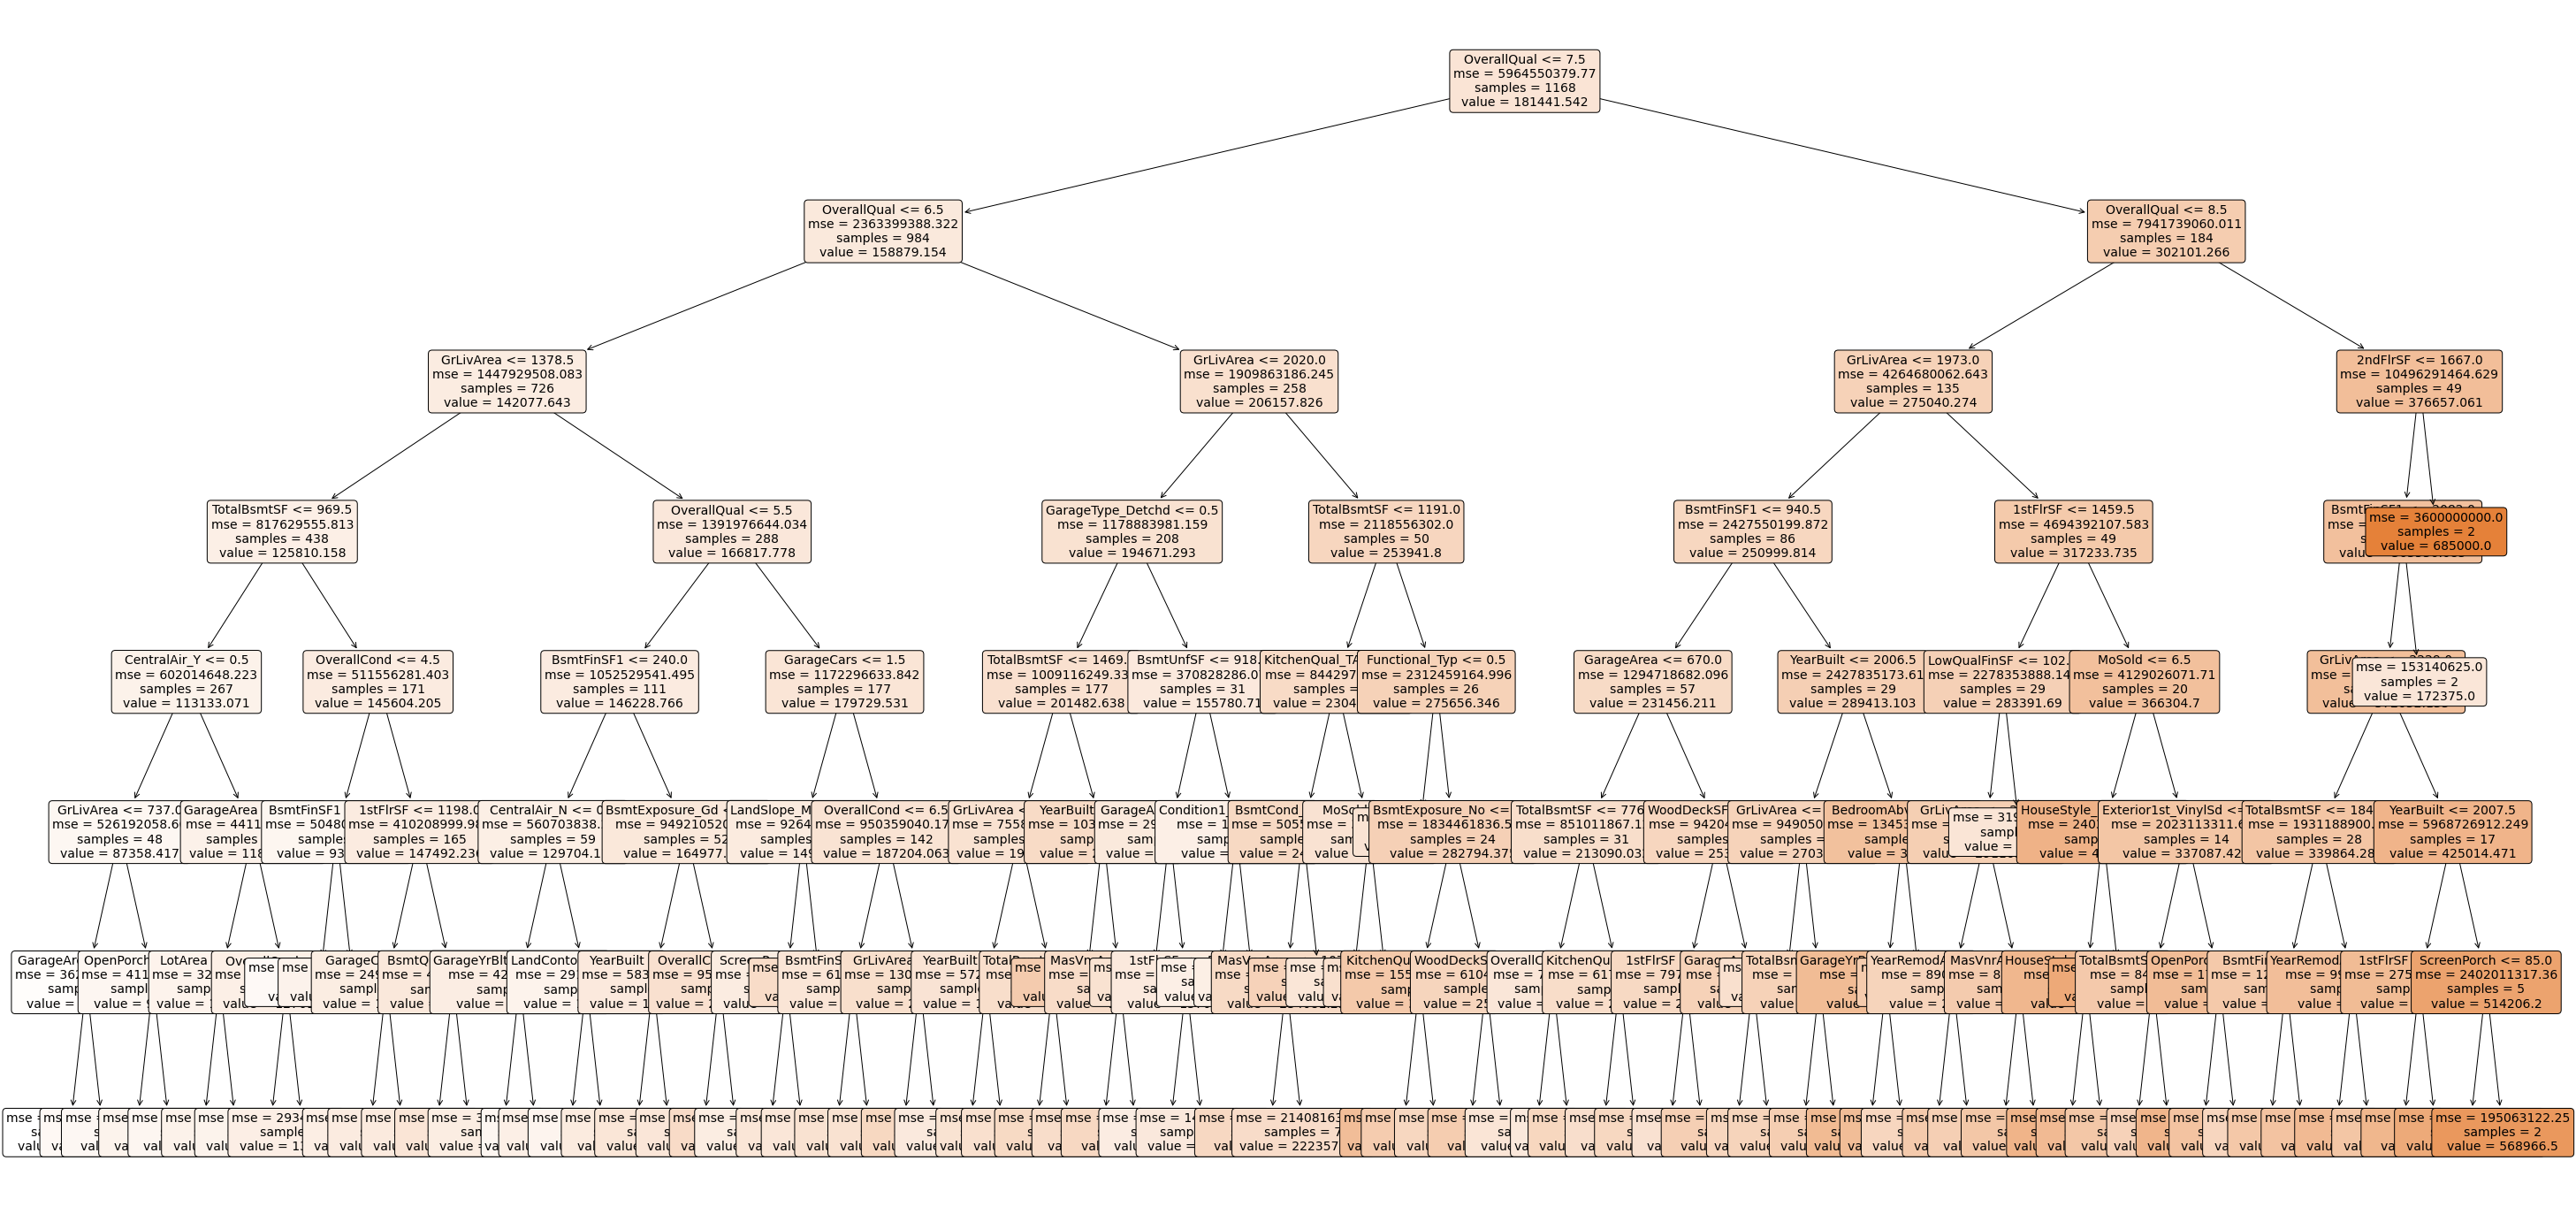

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(50,25))
#create the tree plot
a = tree.plot_tree(modelRTree,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

Como se esperaba, los primeros split se realizan con la variable OverallQual, cosa que se esperaba cuando se veía en la matriz de correlación que era la variable más correlada con Saleprice.

### Random Forest

In [ ]:
rf_oh = RandomForestRegressor(random_state=42) 
rfoh_params = {'n_estimators': np.arange(100,700,100)}

gs_rfoh = GridSearchCV(rf_oh,rfoh_params,cv=3)
gs_rfoh.fit(X_train,y_train)
best_params = gs_rfoh.best_params_

In [ ]:
rfr = RandomForestRegressor(n_estimators=best_params["n_estimators"], random_state=42)
modelRRanFor = rfr.fit(X_train,y_train)
y_pred = modelRRanFor.predict(X_test)

In [ ]:
msle=mean_squared_log_error(y_test,y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) 

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMLSE for the data: 0.15401708508854745
MAE: 17676.651917808216
MSE: 844419864.9449404


Aquí podemos ver la importancia de cada variable para el Random Forest que hemos entrenado, llamada imporancia Gini. Esta calcula para cada atributo la importancia de la suma sobre todas las particiones (entre todos los arboles) que incluyen la variable, proporcional al numero de muestras en las particiones.

In [ ]:
importance = sorted(zip(map(lambda x: round(x, 4), modelRRanFor.feature_importances_), feature_names), reverse=True)
print(importance)

[(0.5581, 'OverallQual'), (0.1224, 'GrLivArea'), (0.035, 'TotalBsmtSF'), (0.0342, '2ndFlrSF'), (0.029, 'BsmtFinSF1'), (0.0273, '1stFlrSF'), (0.0183, 'LotArea'), (0.0153, 'GarageArea'), (0.0147, 'YearBuilt'), (0.0121, 'GarageCars'), (0.0069, 'TotRmsAbvGrd'), (0.0068, 'OpenPorchSF'), (0.0067, 'YearRemodAdd'), (0.0059, 'FullBath'), (0.0053, 'BsmtUnfSF'), (0.0052, 'BsmtQual_Ex'), (0.0043, 'WoodDeckSF'), (0.0039, 'KitchenQual_Gd'), (0.0035, 'ScreenPorch'), (0.0034, 'MoSold'), (0.0034, 'Fireplaces'), (0.0033, 'OverallCond'), (0.0033, 'MasVnrArea'), (0.0028, 'BsmtQual_Gd'), (0.0025, 'MSSubClass'), (0.002, 'GarageType_Detchd'), (0.0019, 'CentralAir_Y'), (0.0019, 'CentralAir_N'), (0.0017, 'GarageType_Attchd'), (0.0015, 'YrSold'), (0.0015, 'PoolArea'), (0.0015, 'LotShape_Reg'), (0.0015, 'ExterQual_Gd'), (0.0015, 'BedroomAbvGr'), (0.0013, 'BsmtExposure_Gd'), (0.0012, 'LandContour_Bnk'), (0.0012, 'BsmtExposure_No'), (0.0011, 'MSZoning_RM'), (0.0011, 'HalfBath'), (0.0011, 'GarageYrBlt_2009.0'), (0.

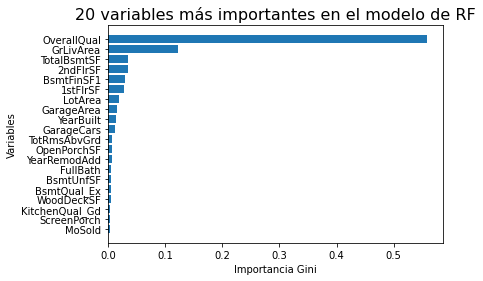

In [ ]:
importances = [pack[0] for pack in importance[19::-1]]
features = [pack[1] for pack in importance[19::-1]]

plt.barh(features, importances)
plt.title("20 variables más importantes en el modelo de RF", fontsize=16)
plt.xlabel("Importancia Gini")
plt.ylabel("Variables");

Como se esperaba, OverallQual es la variable más importante en la predicción de Saleprice, pues ya se veía en la matriz de correlación que era la variable más correlada

## 2 Label Encoding

### Preparación de los datos

Label encoding para las variables categóricas para permitir el uso de árboles

In [ ]:
housing_reg_label = housing_clean.copy()

for nombre_columna in housing_reg_label.columns:
    if housing_reg_label[nombre_columna].dtype == 'object':
        housing_reg_label[nombre_columna] = pd.Categorical(housing_reg_label[nombre_columna]).codes
housing_reg_label.head()

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60         3     8450       1         3            3          0   
1          20         3     9600       1         3            3          0   
2          60         3    11250       1         0            3          0   
3          70         3     9550       1         0            3          0   
4          60         3    14260       1         0            3          0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0             5           2           2         0   
1          2          0            24           1           2         0   
2          4          0             5           2           2         0   
3          0          0             6           2           2         0   
4          2          0            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5            7            5       2003          2003          1   
1           2            6            8       1976          1976          1   
2           5            7            5       2001          2002          1   
3           5            7            5       1915          1970          1   
4           5            8            5       2000          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1           12           13           1       196.0          2   
1         1            8            8           2         0.0          3   
2         1           12           13           1       162.0          2   
3         1           13           15           2         0.0          3   
4         1           12           13           1       350.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         4             3             2   
1          4           1         2         4             1             0   
2          4           2         2         4             2             2   
3          4           0         4         1             3             0   
4          4           2         2         4             0             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         706             6           0        150          856        1   
1         978             6           0        284         1262        1   
2         486             6           0        434          920        1   
3         216             6           0        540          756        1   
4         655             6           0        490         1145        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           4       856       854             0   
1          0           1           4      1262         0             0   
2          0           1           4       920       866             0   
3          2           1           4       961       756             0   
4          0           1           4      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7 

Se separa entre variables predictoras y predichas

In [ ]:
X = housing_reg_label.drop(columns ="SalePrice")
y = housing_reg_label["SalePrice"]

Guardamos las etiquetas tanto de las columnas como los resultados esperados


In [ ]:
feature_names = X.columns
labels = y.unique()

In [ ]:
np.random.seed(123)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Árbol de decisión

In [ ]:
decision_tree = DecisionTreeRegressor(random_state=0)
params = {'max_depth':np.arange(1, 50, 2),
        'min_samples_leaf':np.arange(2, 30)}

gs_decision_tree = GridSearchCV(decision_tree, params, cv=7)
gs_decision_tree.fit(X_train, y_train)
best_params = gs_decision_tree.best_params_

print("Grid Search:")
print(gs_decision_tree)
print("Best params:")
print(best_params)

Grid Search:
GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'min_sample

In [ ]:
# Entrenamos con los parámetros
dtr=DecisionTreeRegressor(max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'], random_state=0)
modelRTree = dtr.fit(X_train,y_train)
y_pred = modelRTree.predict(X_test)

In [ ]:
msle=mean_squared_log_error(y_test, y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))

RMLSE for the data: 0.1886025511726304
MAE: 24346.109633568423
MSE: 1527585120.696698


Representamos graficamente el arbol creado

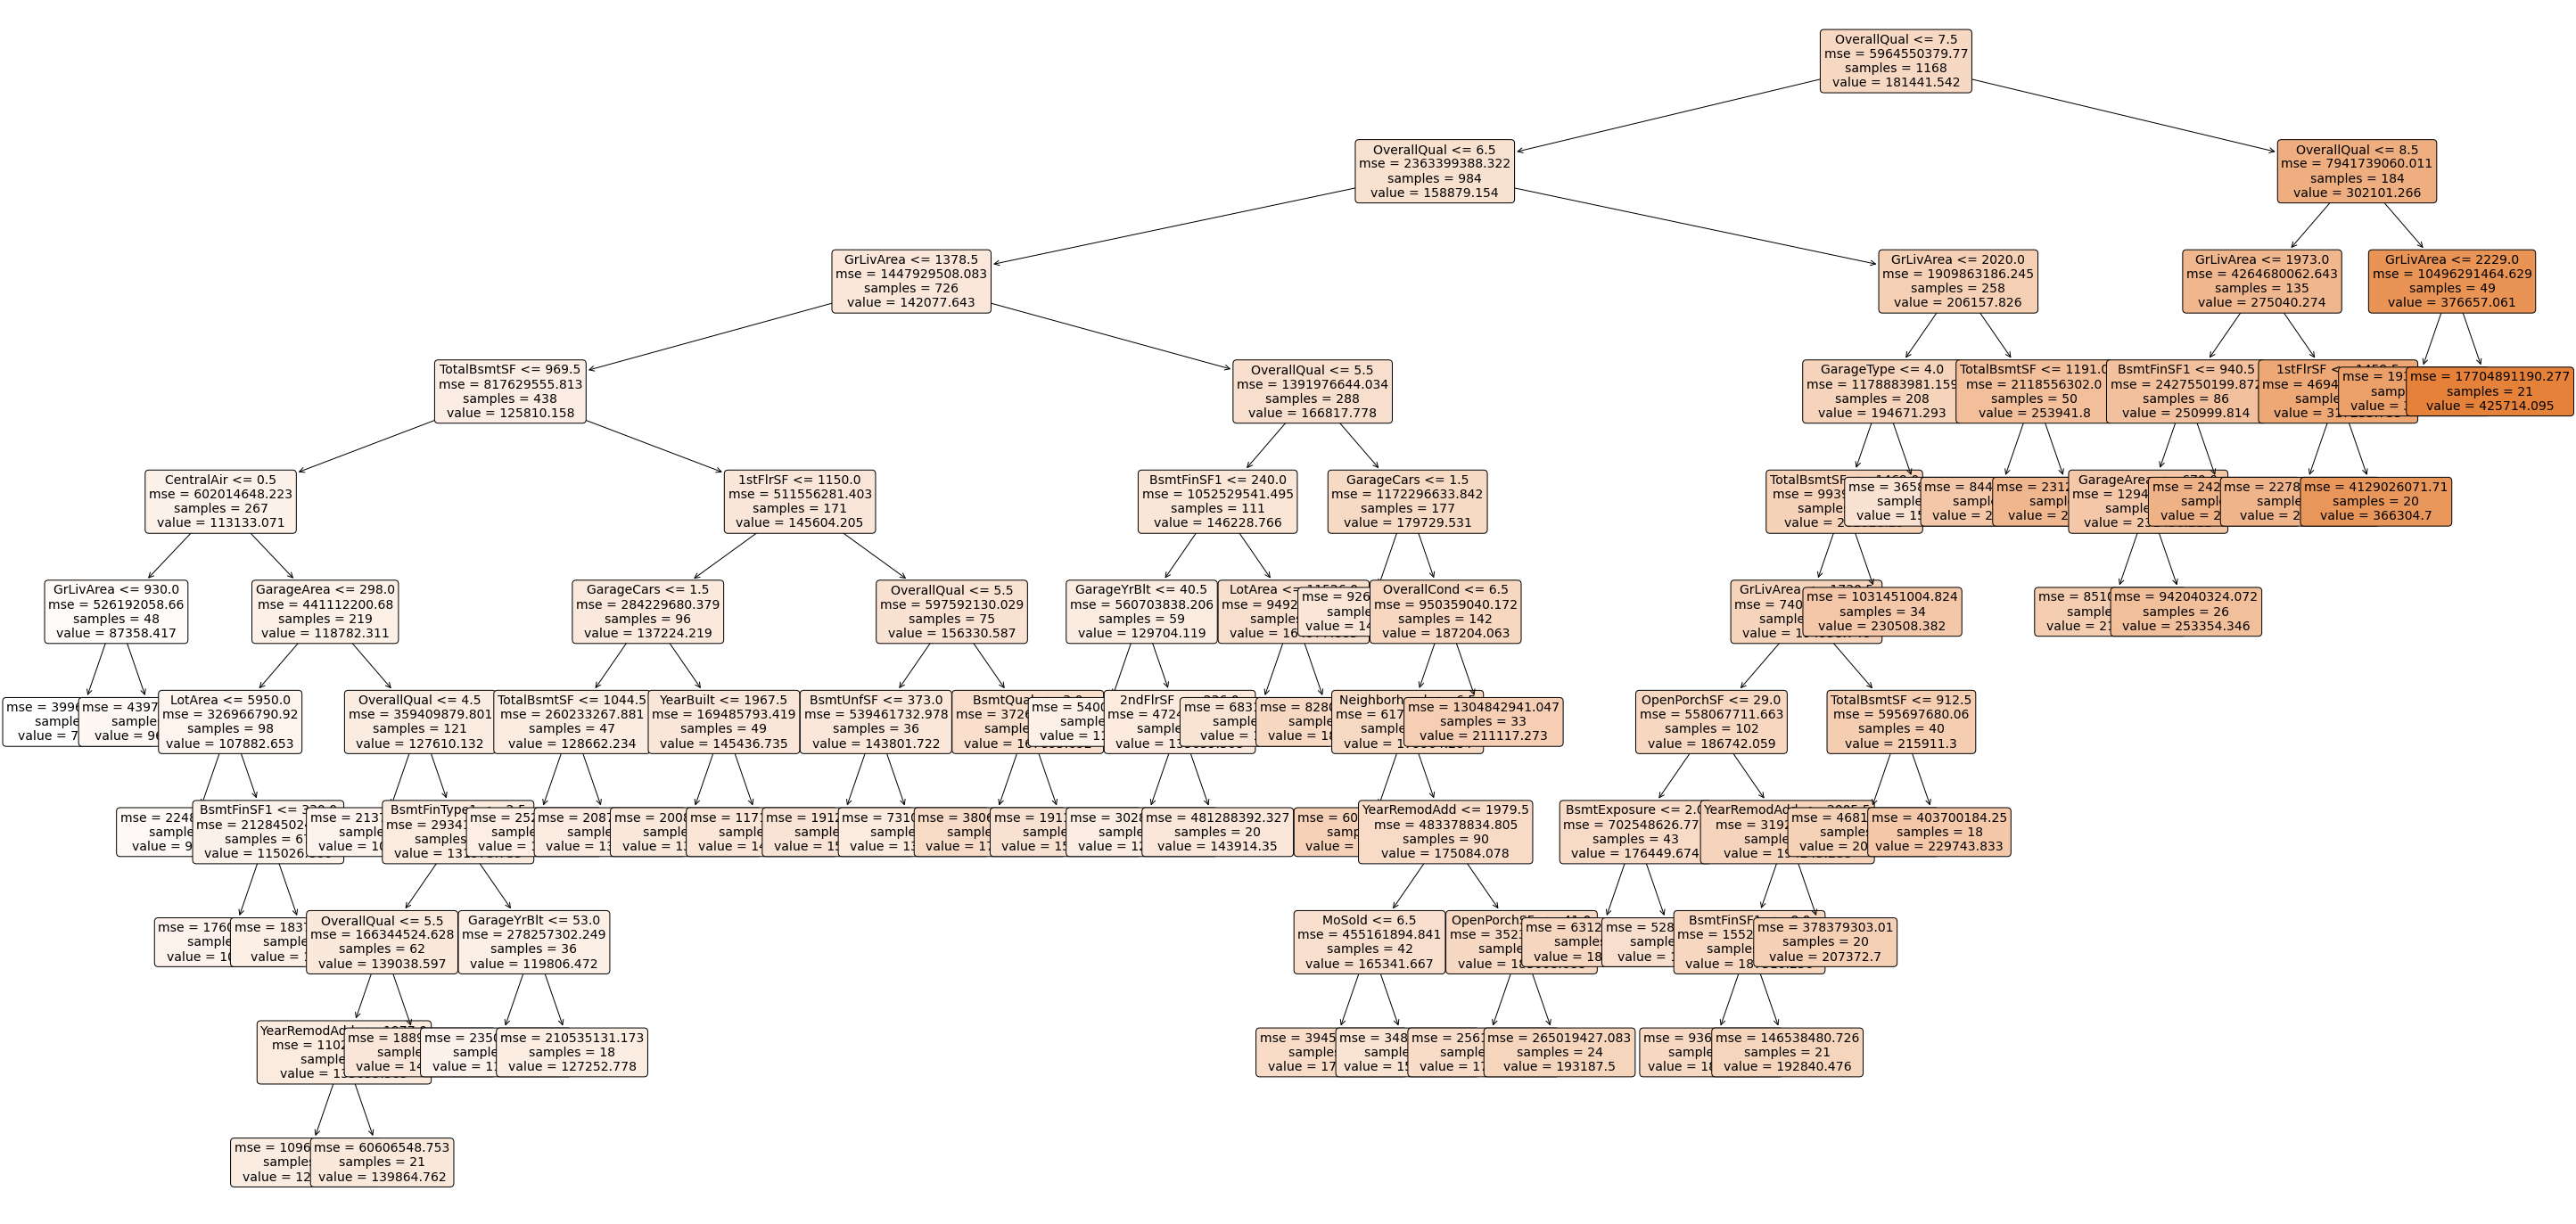

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(50,25))
#create the tree plot
a = tree.plot_tree(modelRTree,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42) 

In [ ]:
rf_params = {'n_estimators': np.arange(100,700,100)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
a_rf = gs_rf.best_params_
a_rf

{'n_estimators': 100}

In [ ]:
rfr=RandomForestRegressor(n_estimators=a_rf['n_estimators'], random_state=42)
modelRRanFor = rfr.fit(X_train,y_train)
y_pred = modelRRanFor.predict(X_test)

In [ ]:
msle=mean_squared_log_error(y_test,y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) 

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMLSE for the data: 0.15284898106431305
MAE: 17527.33359589041
MSE: 803279273.9555875


Aquí podemos ver la importancia de cada variable para el Random Forest que hemos entrenado, llamada imporancia Gini. Esta calcula para cada atributo la importancia de la suma sobre todas las particiones (entre todos los arboles) que incluyen la variable, proporcional al numero de muestras en las particiones.

In [ ]:
importance = sorted(zip(map(lambda x: round(x, 4), modelRRanFor.feature_importances_), feature_names), reverse=True)
print(importance)

[(0.5586, 'OverallQual'), (0.1221, 'GrLivArea'), (0.0349, 'TotalBsmtSF'), (0.0345, '2ndFlrSF'), (0.0295, 'BsmtFinSF1'), (0.0269, '1stFlrSF'), (0.018, 'LotArea'), (0.016, 'GarageArea'), (0.0138, 'YearBuilt'), (0.0121, 'GarageCars'), (0.0096, 'Neighborhood'), (0.0074, 'BsmtQual'), (0.0072, 'YearRemodAdd'), (0.0072, 'TotRmsAbvGrd'), (0.007, 'GarageType'), (0.0061, 'OpenPorchSF'), (0.0061, 'FullBath'), (0.0054, 'BsmtUnfSF'), (0.0047, 'GarageYrBlt'), (0.0046, 'MasVnrArea'), (0.0045, 'WoodDeckSF'), (0.0039, 'OverallCond'), (0.0038, 'CentralAir'), (0.0037, 'MoSold'), (0.0035, 'KitchenQual'), (0.0033, 'ScreenPorch'), (0.0031, 'LandContour'), (0.0029, 'Fireplaces'), (0.0027, 'BsmtExposure'), (0.0026, 'SaleCondition'), (0.0026, 'ExterQual'), (0.0022, 'MSSubClass'), (0.0018, 'LotShape'), (0.0016, 'MSZoning'), (0.0016, 'BedroomAbvGr'), (0.0015, 'YrSold'), (0.0014, 'PoolArea'), (0.0014, 'Exterior2nd'), (0.0013, 'GarageFinish'), (0.0013, 'BsmtFinType1'), (0.0012, 'HalfBath'), (0.0012, 'Exterior1st')

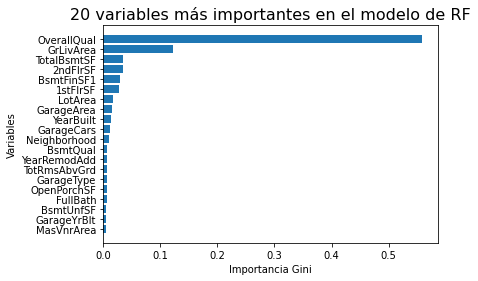

In [ ]:
importances = [pack[0] for pack in importance[19::-1]]
features = [pack[1] for pack in importance[19::-1]]

plt.barh(features, importances)
plt.title("20 variables más importantes en el modelo de RF", fontsize=16)
plt.xlabel("Importancia Gini")
plt.ylabel("Variables");

## 3 Sólo variables numéricas

### Preparación de los datos

Eliminar las variables categóricas para permitir el uso de árboles

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

housing_reg = housing_clean.select_dtypes(include=numerics)
housing_reg

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          196.0         706           0        150          856       856   
1            0.0         978           0        284         1262      1262   
2          162.0         486           0        434          920       920   
3            0.0         216           0        540          756       961   
4          350.0         655           0        490         1145      1145   
...          ...         ...         ...        ...          ...       ...   
1455         0.0           0           0        953          953       953   
1456       119.0         790         163        589         1542      2073   
1457         0.0         275           0        877         1152      1188   
1458         0.0          49        1029          0         1078      1078   
1459         0.0         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42 

Se separa entre variables predictoras y predichas

In [ ]:
X = housing_reg.drop(columns ="SalePrice")
y = housing_reg["SalePrice"]

Guardamos las etiquetas tanto de las columnas como los resultados esperados


In [ ]:
feature_names = X.columns
labels = y.unique()

In [ ]:
np.random.seed(123)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Árbol de decisión

In [ ]:
dt = DecisionTreeRegressor(random_state=0) 
dt_params = {'max_depth':np.arange(1,100,2),'min_samples_leaf':np.arange(2,50)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
best_params = gs_dt.best_params_
best_params

{'max_depth': 7, 'min_samples_leaf': 2}

In [ ]:
# Entrenamos con los parámetros
dtr=DecisionTreeRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"], random_state=0)
modelRTree = dtr.fit(X_train,y_train)
y_pred = modelRTree.predict(X_test)

In [ ]:
msle=mean_squared_log_error(y_test, y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))

RMLSE for the data: 0.20292613207598878
MAE: 24961.08939955761
MSE: 1388544896.4070702


Representamos graficamente el arbol creado

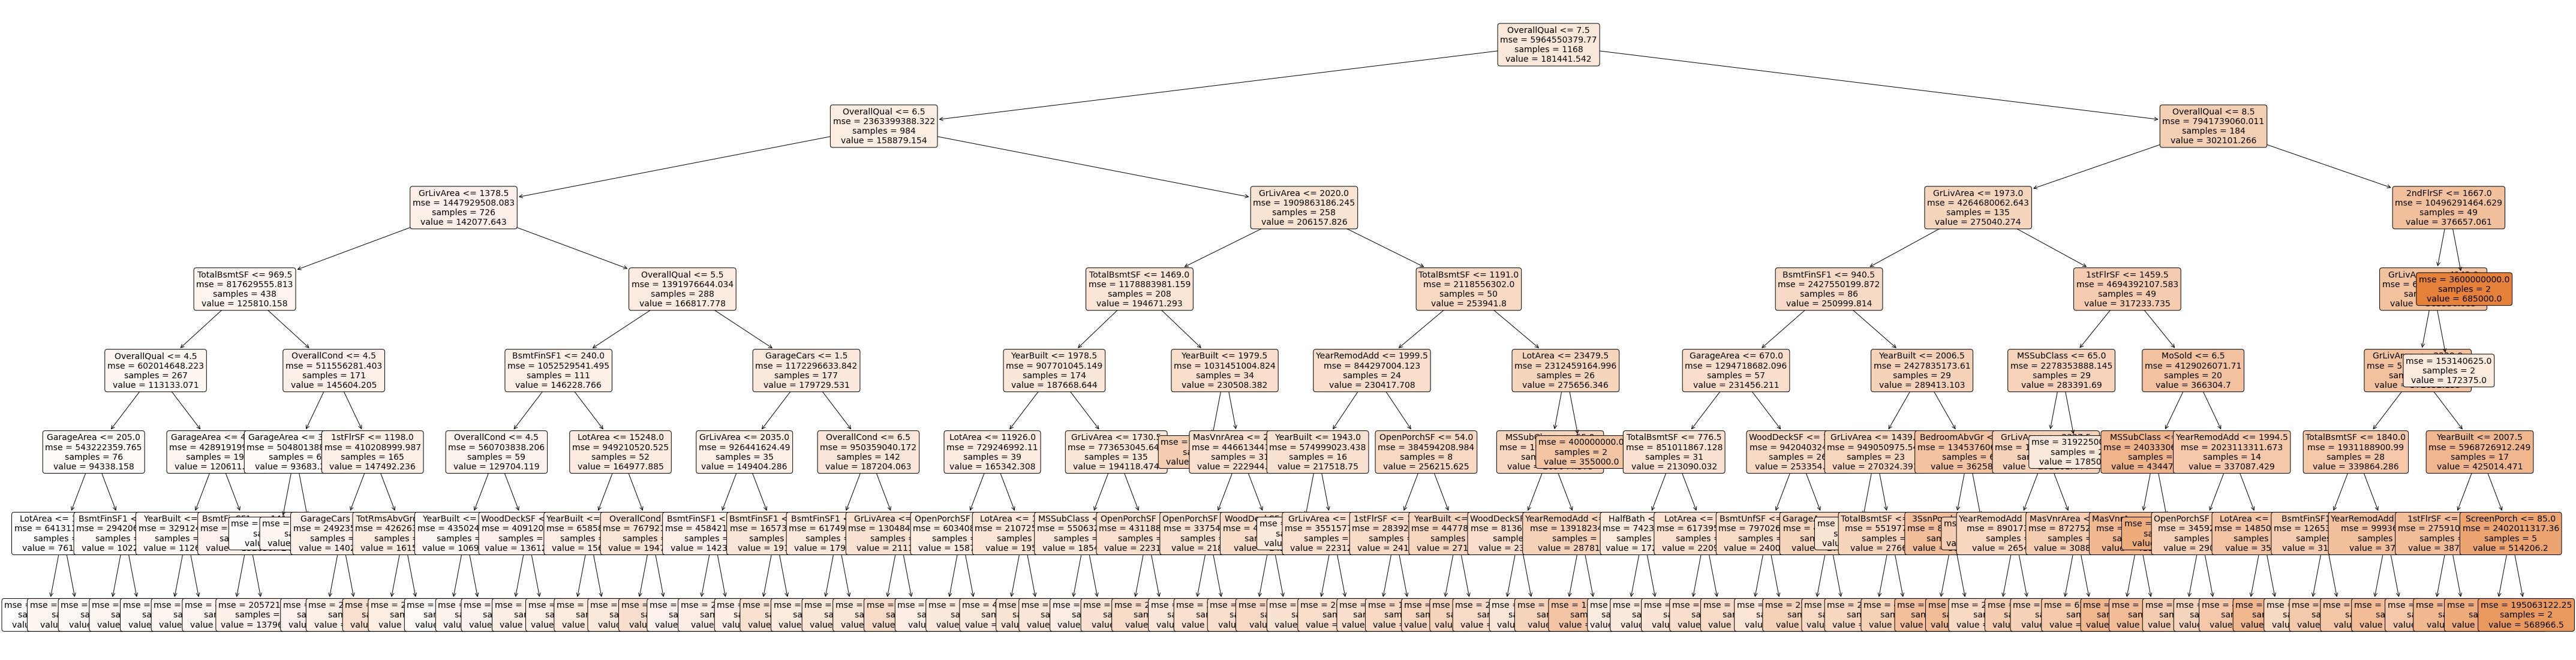

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(75,20))
#create the tree plot
a = tree.plot_tree(modelRTree,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42) 

In [ ]:
rf_params = {'n_estimators': np.arange(100,700,100)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
a_rf = gs_rf.best_params_
a_rf

{'n_estimators': 100}

In [ ]:
rfr=RandomForestRegressor(n_estimators=a_rf["n_estimators"], random_state=42)
modelRRanFor = rfr.fit(X_train,y_train)
y_pred = modelRRanFor.predict(X_test)

In [ ]:
msle=mean_squared_log_error(y_test,y_pred)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) 

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMLSE for the data: 0.15476621804673782
MAE: 18026.53142694064
MSE: 842009634.7150235


Aquí podemos ver la importancia de cada variable para el Random Forest que hemos entrenado, llamada imporancia Gini. Esta calcula para cada atributo la importancia de la suma sobre todas las particiones (entre todos los arboles) que incluyen la variable, proporcional al numero de muestras en las particiones.

In [ ]:
importance = sorted(zip(map(lambda x: round(x, 4), modelRRanFor.feature_importances_), feature_names), reverse=True)
print(importance)

[(0.5638, 'OverallQual'), (0.1264, 'GrLivArea'), (0.0384, 'TotalBsmtSF'), (0.0366, '2ndFlrSF'), (0.035, 'BsmtFinSF1'), (0.0314, '1stFlrSF'), (0.0228, 'LotArea'), (0.0214, 'YearBuilt'), (0.0201, 'GarageArea'), (0.014, 'GarageCars'), (0.0127, 'YearRemodAdd'), (0.0087, 'TotRmsAbvGrd'), (0.0087, 'OpenPorchSF'), (0.0065, 'FullBath'), (0.0064, 'BsmtUnfSF'), (0.0063, 'WoodDeckSF'), (0.0056, 'OverallCond'), (0.0052, 'MasVnrArea'), (0.0049, 'MoSold'), (0.0039, 'MSSubClass'), (0.0038, 'Fireplaces'), (0.0035, 'ScreenPorch'), (0.0024, 'PoolArea'), (0.0023, 'BedroomAbvGr'), (0.0022, 'YrSold'), (0.0014, 'BsmtFullBath'), (0.0013, 'HalfBath'), (0.0012, 'KitchenAbvGr'), (0.0012, 'BsmtFinSF2'), (0.0009, 'EnclosedPorch'), (0.0006, '3SsnPorch'), (0.0002, 'LowQualFinSF'), (0.0002, 'BsmtHalfBath'), (0.0001, 'MiscVal')]


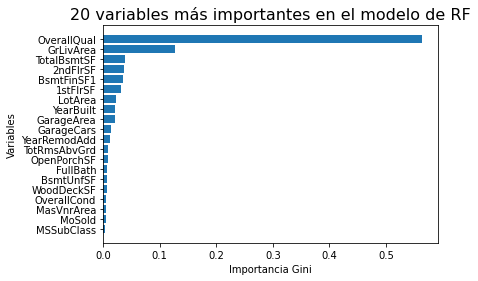

In [ ]:
importances = [pack[0] for pack in importance[19::-1]]
features = [pack[1] for pack in importance[19::-1]]

plt.barh(features, importances)
plt.title("20 variables más importantes en el modelo de RF", fontsize=16)
plt.xlabel("Importancia Gini")
plt.ylabel("Variables");

---

#Análisis resultados regresión

Se puede ver que la mayor precisión se ha obtenido con el dataset de Label encoding. Aunque las variables categóricas no tienen un orden, y por tanto lo lógico sería usar one-hot encoding, lo cierto es que one-hot encoding con muchas variables en ocasiones puede generar problemas en los árboles de regresión. Es por eso que se ha obtenido:
1. One-hot encoding:
  * Árbol RMLSE: 0.219
  * Random Forest RMLSE: 0.154
2. Label Encoding:
  * Árbol RMLSE: 0.188 
  * Random Forest RMLSE: 0.152
3. Variables numéricas solo:
  * Árbol RMLSE: 0.202
  * Random Forest RMLSE: 0.154


Por otro lado, los resultados obtenidos en R son:
* Árbol RMLSE sin podar: 0.25
* Árbol RMLSE con la poda: 0.26

* Random Forest RMLSE sin podar: 0.148
* Random Forest RMLSE con la poda: 0.15


En el R adjunto, la regresión se hace para todas las variables excepto GarageYrBlt (por correlación con YearBl) con tanto para árboles de decisión como para RandomForest. 
Es interesante comentar que, para árboles de decisión, en R que hemos trabajado con estas 73 variables, obtenemos un valor de RMLSE más alto que los obtenidos por Python con distintos métodos de selección y reducción de variables.
Por otro lado, cuando tratamos con los Random Forest, los errores obtenidos son menores. Esto se puede deber a que al tratar con más variables, el modelo puede llegar a ser más general y por tanto generalizar los valores de test de forma más satisfactoria. 

# Clasificación

## Clases no equilibradas

Primero se definen las clases con los rangos propuestos en la actividad. Se va a usar Label encoding, ya que ha dado los mejores resultados en los modelos de regresión

In [16]:
housing_reg_label = housing_clean.copy()

for nombre_columna in housing_reg_label:
    if housing_reg_label[nombre_columna].dtype == 'object':
        housing_reg_label[nombre_columna] = pd.Categorical(housing_reg_label[nombre_columna]).codes
housing_reg_label.head()

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60         3     8450       1         3            3          0   
1          20         3     9600       1         3            3          0   
2          60         3    11250       1         0            3          0   
3          70         3     9550       1         0            3          0   
4          60         3    14260       1         0            3          0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0             5           2           2         0   
1          2          0            24           1           2         0   
2          4          0             5           2           2         0   
3          0          0             6           2           2         0   
4          2          0            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5            7            5       2003          2003          1   
1           2            6            8       1976          1976          1   
2           5            7            5       2001          2002          1   
3           5            7            5       1915          1970          1   
4           5            8            5       2000          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1           12           13           1       196.0          2   
1         1            8            8           2         0.0          3   
2         1           12           13           1       162.0          2   
3         1           13           15           2         0.0          3   
4         1           12           13           1       350.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         4             3             2   
1          4           1         2         4             1             0   
2          4           2         2         4             2             2   
3          4           0         4         1             3             0   
4          4           2         2         4             0             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         706             6           0        150          856        1   
1         978             6           0        284         1262        1   
2         486             6           0        434          920        1   
3         216             6           0        540          756        1   
4         655             6           0        490         1145        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           4       856       854             0   
1          0           1           4      1262         0             0   
2          0           1           4       920       866             0   
3          2           1           4       961       756             0   
4          0           1           4      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7 

In [17]:
X = housing_reg_label.drop(columns ="SalePrice")
y = housing_reg_label["SalePrice"]

In [18]:
feature_names = X.columns
labels = y.unique()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
y_train_class = y_train.copy()
y_test_class = y_test.copy()

In [21]:
y_train_class[y_train_class <= 100000] = 1
y_train_class[(y_train_class > 100000) & (y_train_class <= 500000)] = 2
y_train_class[y_train_class > 500000] = 3

y_test_class[y_test_class <= 100000] = 1
y_test_class[(y_test_class > 100000) & (y_test_class <= 500000)] = 2
y_test_class[y_test_class > 500000] = 3

In [22]:
print(len(y_train_class[y_train_class == 1]), ', ', len(y_train_class[y_train_class == 2]), ', ', len(y_train_class[y_train_class == 3]))
print(len(y_test_class[y_test_class == 1]), ', ', len(y_test_class[y_test_class == 2]), ', ', len(y_test_class[y_test_class == 3]))

97 ,  1065 ,  6
26 ,  263 ,  3


In [23]:
labels = y_train_class.unique()
labels = [str(int) for int in labels] #Transformamos los resultados a string para poder pintarlos más adelante
labels

['2', '1', '3']

### Árbol de decisión

In [24]:
dt_c = DecisionTreeClassifier(criterion="entropy", random_state=0)  
dtc_params = {'max_depth':np.arange(1,100,2),'min_samples_leaf':np.arange(2,50)}

gs_dtc = GridSearchCV(dt_c,dtc_params,cv=3)
gs_dtc.fit(X_train,y_train_class)
best_params = gs_dtc.best_params_
best_params

{'max_depth': 5, 'min_samples_leaf': 13}

In [25]:
# Entrenamos con los parámetros
dtc=DecisionTreeClassifier(criterion = "entropy", max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'], random_state=0)
modelCTree = dtc.fit(X_train,y_train_class)
y_pred_class = modelCTree.predict(X_test)

In [27]:
CM = confusion_matrix(y_test_class, y_pred_class)
print('Confusion matrix:\n', CM)
AC= accuracy_score(y_test_class, y_pred_class)
print('Accuracy: ', AC)

Confusion matrix:
 [[ 13  13   0]
 [  9 254   0]
 [  0   3   0]]
Accuracy:  0.9143835616438356


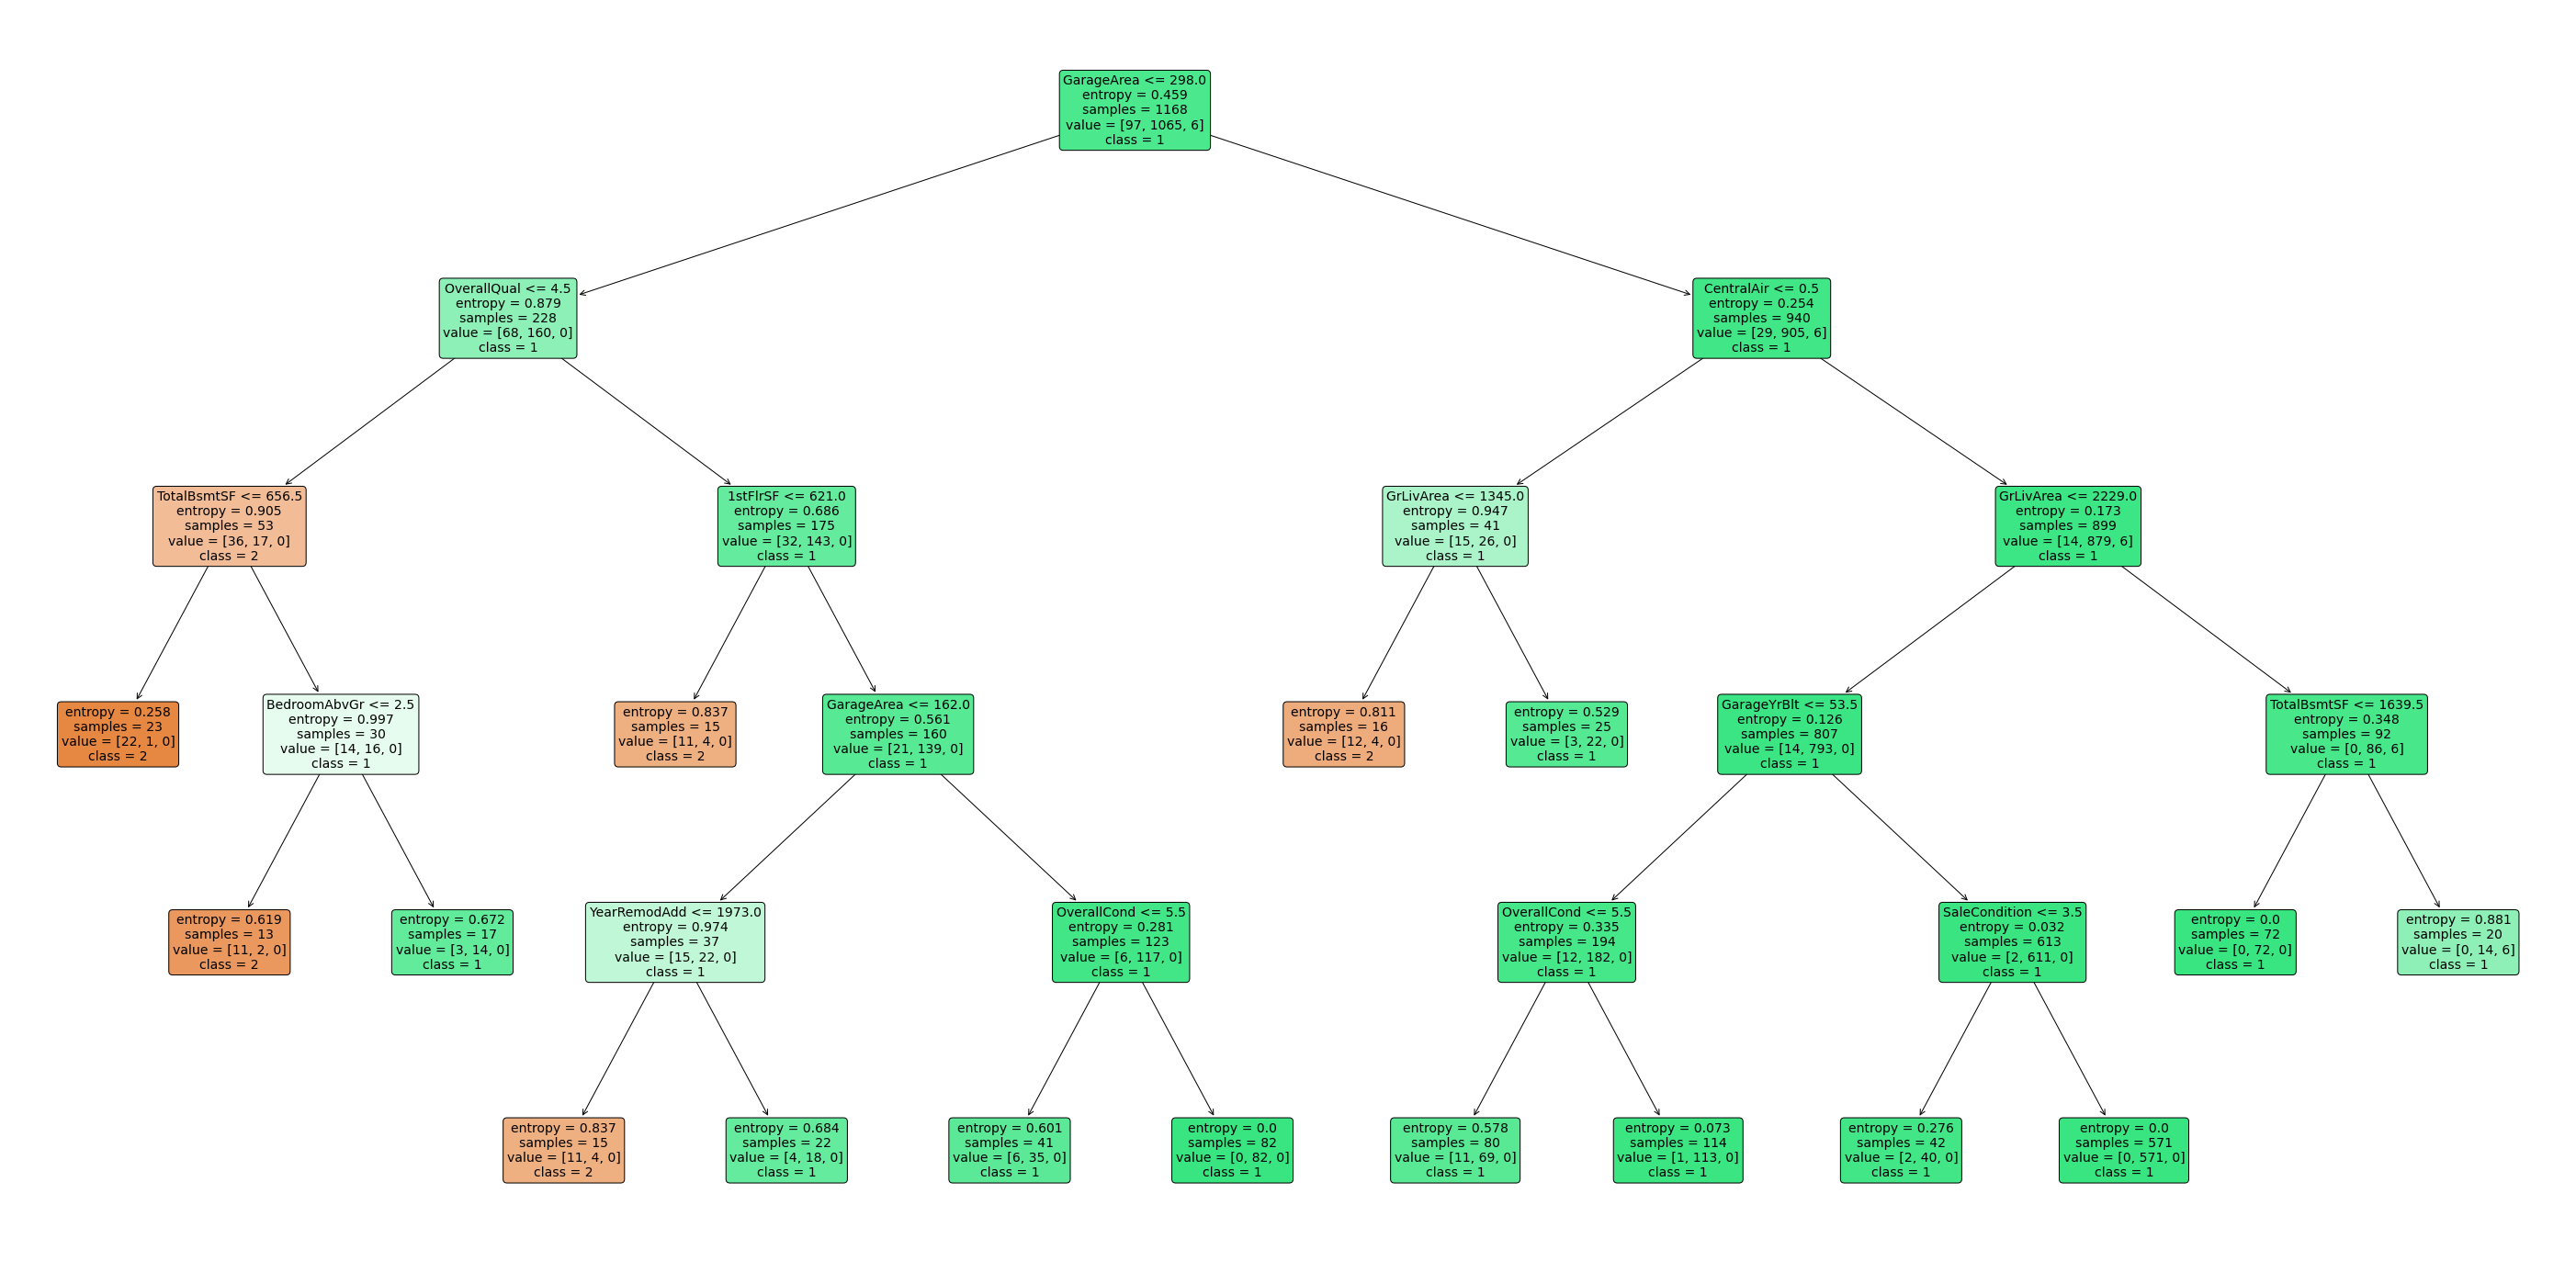

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(50,25))
#create the tree plot
a = tree.plot_tree(modelCTree,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

### Random Forest

In [28]:
dt_c = RandomForestClassifier(criterion="entropy", random_state=42)  
dtc_params = {'n_estimators': np.arange(100,700,100)}

gs_dtc = GridSearchCV(dt_c,dtc_params,cv=3)
gs_dtc.fit(X_train,y_train_class)
best_params = gs_dtc.best_params_
best_params

{'n_estimators': 100}

In [29]:
classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'], criterion='entropy', random_state=42) 
modelRTree = classifier.fit(X_train, y_train_class)
y_pred_class = modelRTree.predict(X_test)

In [30]:
CM = confusion_matrix(y_test_class, y_pred_class)
print('Confusion matrix:\n', CM)
AC= accuracy_score(y_test_class, y_pred_class)
print('Accuracy: ', AC)

Confusion matrix:
 [[ 10  16   0]
 [  3 260   0]
 [  0   2   1]]
Accuracy:  0.928082191780822


In [ ]:
importance = sorted(zip(map(lambda x: round(x, 4), modelRTree.feature_importances_), feature_names), reverse=True)
print(importance)

[(0.0658, 'GrLivArea'), (0.0602, 'TotalBsmtSF'), (0.0573, 'GarageArea'), (0.0484, '1stFlrSF'), (0.0394, 'OverallQual'), (0.0383, 'LotArea'), (0.0379, 'GarageYrBlt'), (0.0376, 'YearRemodAdd'), (0.0359, 'YearBuilt'), (0.033, 'CentralAir'), (0.0316, 'GarageCars'), (0.0311, 'OverallCond'), (0.0293, 'BsmtFinSF1'), (0.0247, 'TotRmsAbvGrd'), (0.0243, 'GarageType'), (0.0215, 'BsmtUnfSF'), (0.0213, 'GarageCond'), (0.0196, 'GarageQual'), (0.0195, '2ndFlrSF'), (0.0169, 'MSSubClass'), (0.0156, 'HeatingQC'), (0.0146, 'MoSold'), (0.0139, 'OpenPorchSF'), (0.0121, 'FullBath'), (0.0117, 'BedroomAbvGr'), (0.011, 'Exterior2nd'), (0.0107, 'BsmtFinType1'), (0.0102, 'YrSold'), (0.0101, 'MSZoning'), (0.0101, 'Exterior1st'), (0.0095, 'Neighborhood'), (0.0094, 'PavedDrive'), (0.0092, 'MasVnrArea'), (0.0091, 'WoodDeckSF'), (0.009, 'SaleCondition'), (0.0087, 'EnclosedPorch'), (0.0084, 'KitchenQual'), (0.0081, 'Fireplaces'), (0.0075, 'GarageFinish'), (0.0074, 'HouseStyle'), (0.0074, 'BsmtQual'), (0.0069, 'Electri

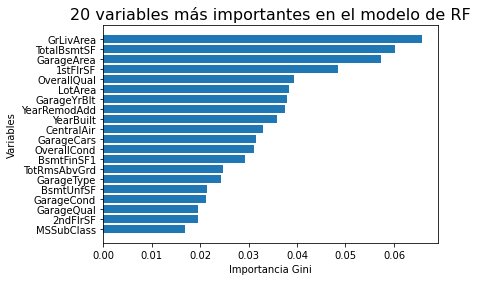

In [ ]:
importances = [pack[0] for pack in importance[19::-1]]
features = [pack[1] for pack in importance[19::-1]]

plt.barh(features, importances)
plt.title("20 variables más importantes en el modelo de RF", fontsize=16)
plt.xlabel("Importancia Gini")
plt.ylabel("Variables");

---

## Clases equilibradas

Se prueba a equilibrar ligeramente las clases para ver si se obtiene un mejor resultado. Se va a usar Label encoding, ya que ha dado los mejores resultados en los modelos de regresión

In [31]:
housing_reg_label = housing_clean.copy()

for nombre_columna in housing_reg_label:
    if housing_reg_label[nombre_columna].dtype == 'object':
        housing_reg_label[nombre_columna] = pd.Categorical(housing_reg_label[nombre_columna]).codes
housing_reg_label.head()

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60         3     8450       1         3            3          0   
1          20         3     9600       1         3            3          0   
2          60         3    11250       1         0            3          0   
3          70         3     9550       1         0            3          0   
4          60         3    14260       1         0            3          0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0             5           2           2         0   
1          2          0            24           1           2         0   
2          4          0             5           2           2         0   
3          0          0             6           2           2         0   
4          2          0            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5            7            5       2003          2003          1   
1           2            6            8       1976          1976          1   
2           5            7            5       2001          2002          1   
3           5            7            5       1915          1970          1   
4           5            8            5       2000          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1           12           13           1       196.0          2   
1         1            8            8           2         0.0          3   
2         1           12           13           1       162.0          2   
3         1           13           15           2         0.0          3   
4         1           12           13           1       350.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         4             3             2   
1          4           1         2         4             1             0   
2          4           2         2         4             2             2   
3          4           0         4         1             3             0   
4          4           2         2         4             0             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         706             6           0        150          856        1   
1         978             6           0        284         1262        1   
2         486             6           0        434          920        1   
3         216             6           0        540          756        1   
4         655             6           0        490         1145        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           4       856       854             0   
1          0           1           4      1262         0             0   
2          0           1           4       920       866             0   
3          2           1           4       961       756             0   
4          0           1           4      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7 

In [32]:
X = housing_reg_label.drop(columns ="SalePrice")
y = housing_reg_label["SalePrice"]

In [33]:
feature_names = X.columns
labels = y.unique()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
y_train_class = y_train.copy()
y_test_class = y_test.copy()

In [36]:
y_train_class[y_train_class <= 150000] = 1
y_train_class[(y_train_class > 150000) & (y_train_class <= 300000)] = 2
y_train_class[y_train_class > 300000] = 3

y_test_class[y_test_class <= 150000] = 1
y_test_class[(y_test_class > 150000) & (y_test_class <= 300000)] = 2
y_test_class[y_test_class > 300000] = 3

In [37]:
print(len(y_train_class[y_train_class == 1]), ', ', len(y_train_class[y_train_class == 2]), ', ', len(y_train_class[y_train_class == 3]))
print(len(y_test_class[y_test_class == 1]), ', ', len(y_test_class[y_test_class == 2]), ', ', len(y_test_class[y_test_class == 3]))

480 ,  597 ,  91
139 ,  129 ,  24


In [38]:
labels = y_train_class.unique()
labels = [str(int) for int in labels] #Transformamos los resultados a string para poder pintarlos más adelante
labels

['1', '2', '3']

### Árbol de decisión

In [39]:
dt_c = DecisionTreeClassifier(criterion="entropy", random_state=0)  
dtc_params = {'max_depth':np.arange(1,100,2),'min_samples_leaf':np.arange(2,50)}

gs_dtc = GridSearchCV(dt_c,dtc_params,cv=3)
gs_dtc.fit(X_train,y_train_class)
best_params = gs_dtc.best_params_
best_params

{'max_depth': 7, 'min_samples_leaf': 17}

In [40]:
# Entrenamos con los parámetros
dtc=DecisionTreeClassifier(criterion = "entropy", max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'], random_state=0)
modelCTree = dtc.fit(X_train,y_train_class)
y_pred_class = modelCTree.predict(X_test)

In [41]:
CM = confusion_matrix(y_test_class, y_pred_class)
print('Confusion matrix:\n', CM)
AC= accuracy_score(y_test_class, y_pred_class)
print('Accuracy: ', AC)

Confusion matrix:
 [[121  18   0]
 [ 20 104   5]
 [  0   7  17]]
Accuracy:  0.8287671232876712


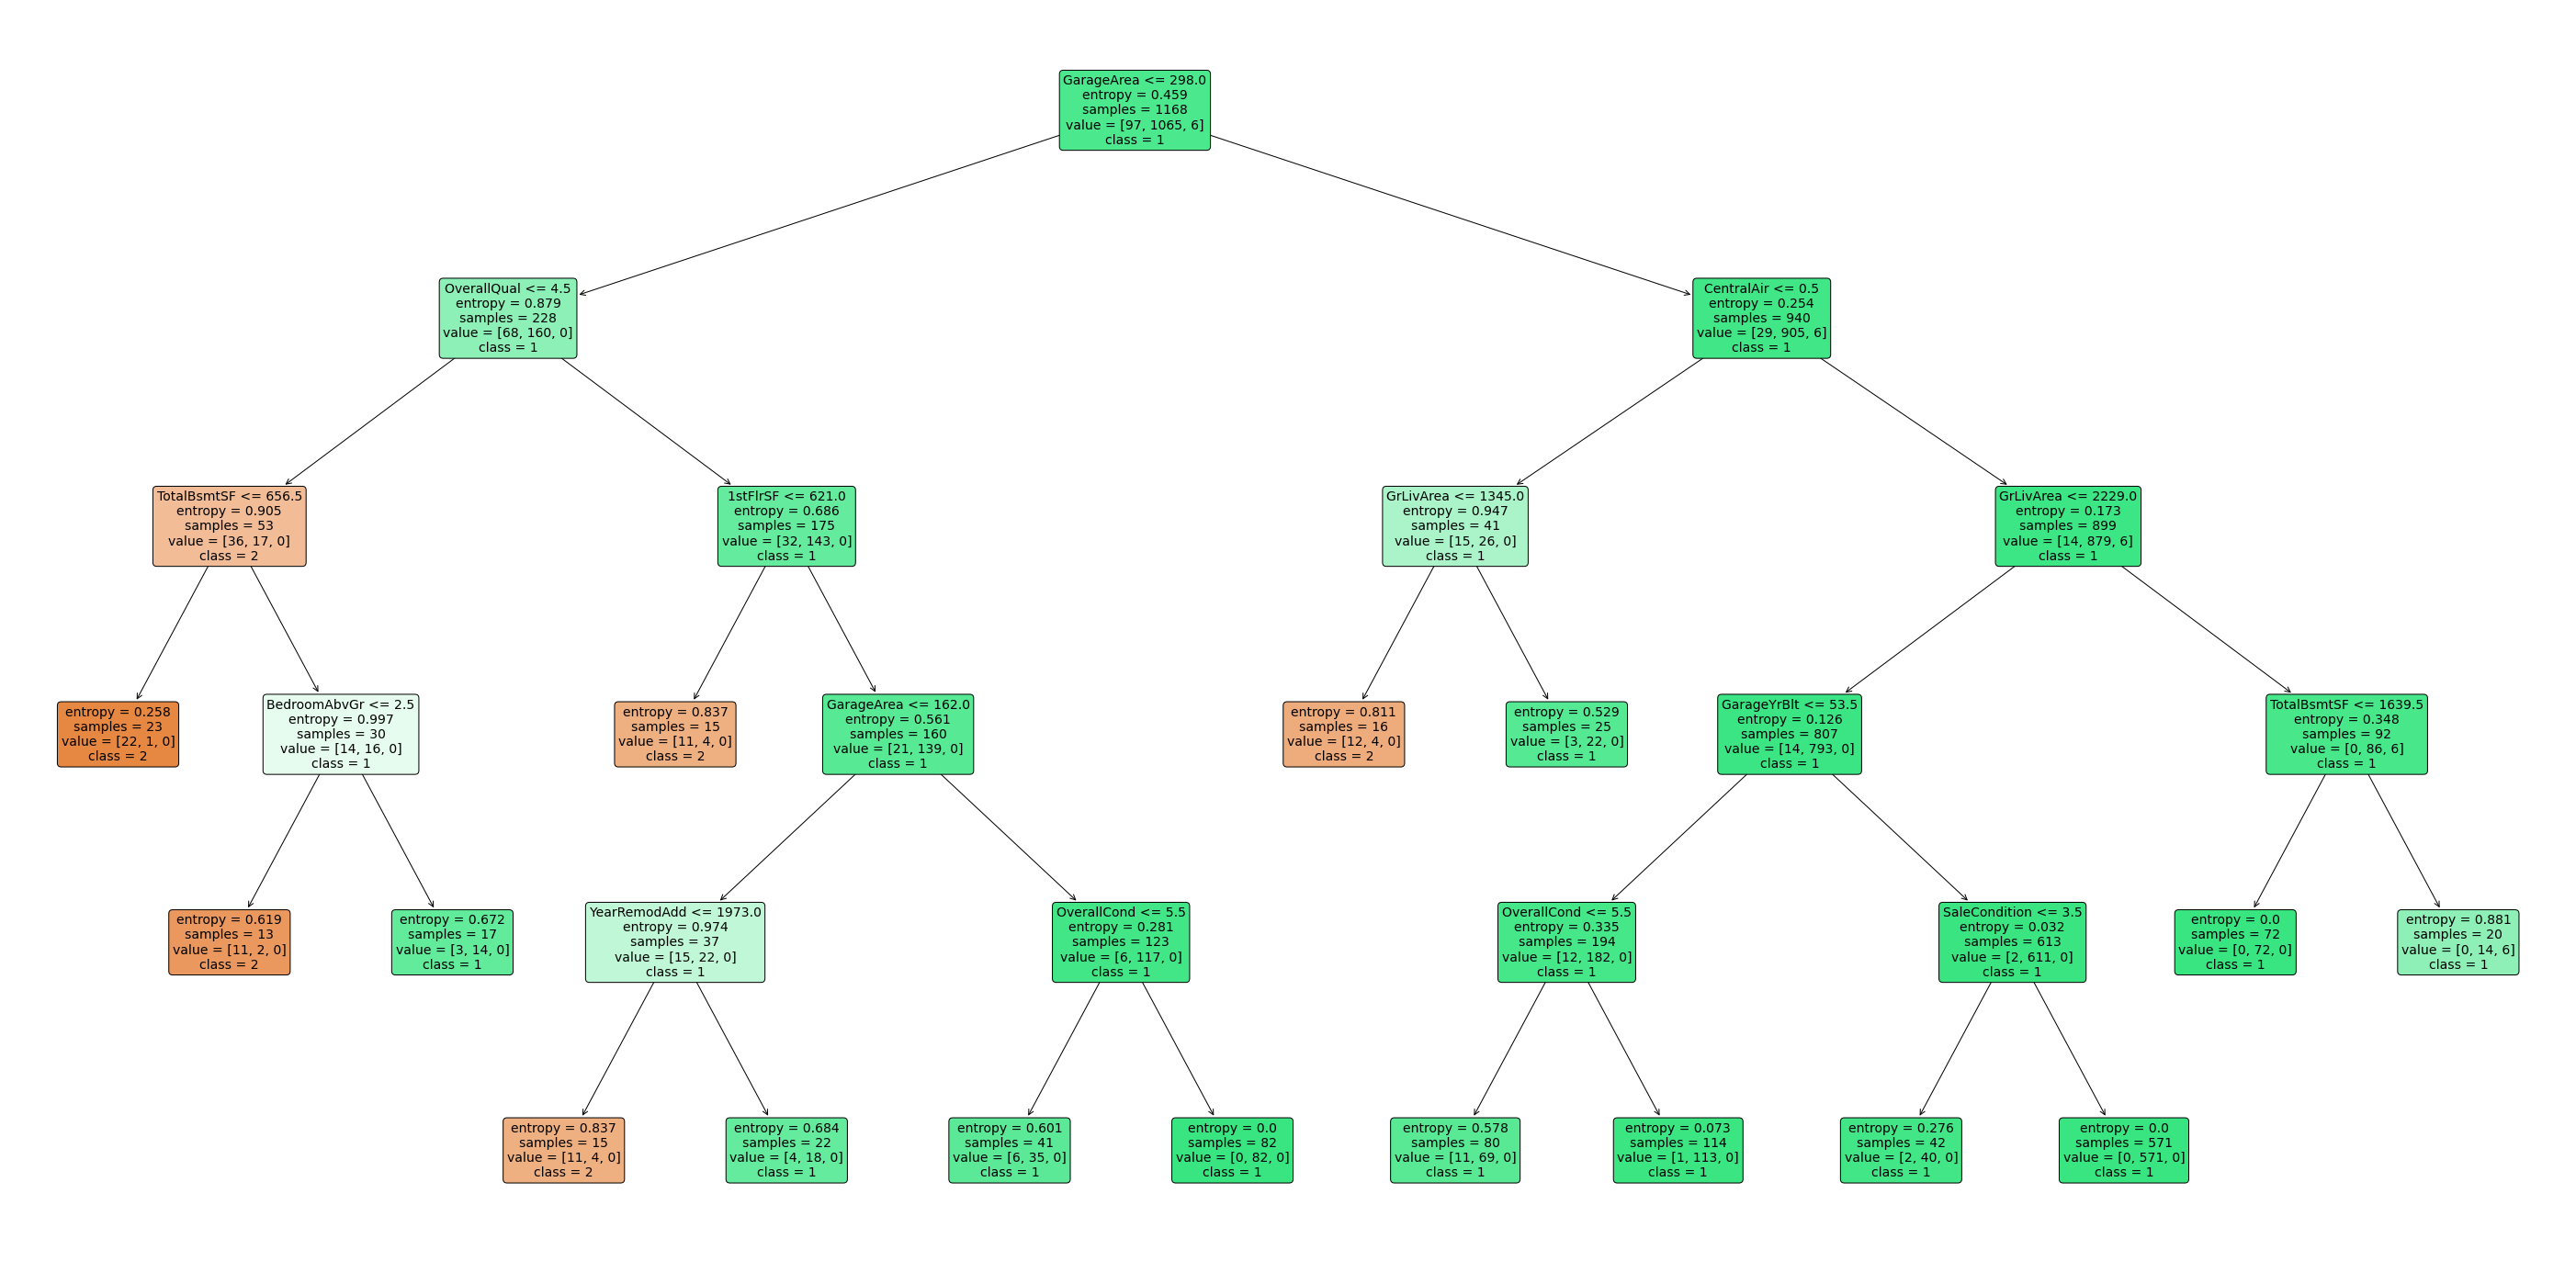

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(50,25))
#create the tree plot
a = tree.plot_tree(modelCTree,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

### Random Forest

In [42]:
dt_c = RandomForestClassifier(criterion="entropy", random_state=42)  
dtc_params = {'n_estimators': np.arange(100,700,100)}

gs_dtc = GridSearchCV(dt_c,dtc_params,cv=3)
gs_dtc.fit(X_train,y_train_class)
best_params = gs_dtc.best_params_
best_params

{'n_estimators': 300}

In [43]:
classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'], criterion='entropy', random_state=42) 
modelRTree = classifier.fit(X_train, y_train_class)
y_pred_class = modelRTree.predict(X_test)

In [44]:
CM = confusion_matrix(y_test_class, y_pred_class)
print('Confusion matrix:\n', CM)
AC= accuracy_score(y_test_class, y_pred_class)
print('Accuracy: ', AC)

Confusion matrix:
 [[133   6   0]
 [ 13 113   3]
 [  0   7  17]]
Accuracy:  0.9006849315068494


In [ ]:
importance = sorted(zip(map(lambda x: round(x, 4), modelRTree.feature_importances_), feature_names), reverse=True)
print(importance)

[(0.0901, 'GrLivArea'), (0.0795, 'OverallQual'), (0.0514, 'YearBuilt'), (0.0497, 'GarageArea'), (0.0475, '1stFlrSF'), (0.047, 'TotalBsmtSF'), (0.047, 'GarageCars'), (0.0348, 'BsmtQual'), (0.0335, 'LotArea'), (0.0304, 'BsmtFinSF1'), (0.029, 'FullBath'), (0.0268, 'YearRemodAdd'), (0.0268, 'Fireplaces'), (0.0253, '2ndFlrSF'), (0.0242, 'GarageType'), (0.02, 'KitchenQual'), (0.0192, 'TotRmsAbvGrd'), (0.0188, 'GarageYrBlt'), (0.0183, 'ExterQual'), (0.017, 'BsmtUnfSF'), (0.0167, 'GarageFinish'), (0.0146, 'OpenPorchSF'), (0.014, 'MasVnrArea'), (0.0137, 'Neighborhood'), (0.0136, 'WoodDeckSF'), (0.0131, 'HalfBath'), (0.0101, 'MSSubClass'), (0.0098, 'MoSold'), (0.0087, 'OverallCond'), (0.0083, 'Foundation'), (0.008, 'MSZoning'), (0.0076, 'HeatingQC'), (0.0075, 'Exterior2nd'), (0.0074, 'HouseStyle'), (0.0073, 'BsmtFinType1'), (0.0069, 'Exterior1st'), (0.0069, 'BsmtExposure'), (0.0065, 'BedroomAbvGr'), (0.0064, 'YrSold'), (0.0052, 'BldgType'), (0.0049, 'LotShape'), (0.0048, 'SaleCondition'), (0.004

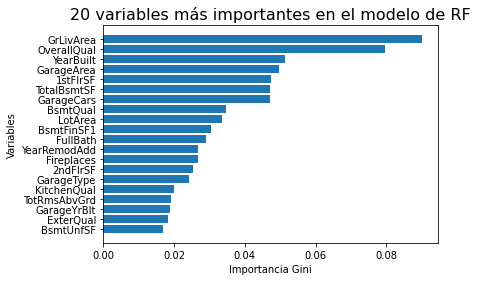

In [ ]:
importances = [pack[0] for pack in importance[19::-1]]
features = [pack[1] for pack in importance[19::-1]]

plt.barh(features, importances)
plt.title("20 variables más importantes en el modelo de RF", fontsize=16)
plt.xlabel("Importancia Gini")
plt.ylabel("Variables");

---

# Análisis de resultados de clasificación

Se han obtenido los siguientes resultados tras la clasificación:
1. Clases no equilibradas:
  * Árbol Accuracy: 0.914
  * Random Forest Accuracy: 0.928
2. Clases equilibradas
  * Árbol Accuracy: 0.828
  * Random Forest Accuracy: 0.900
3. R: Hemos trabajado con matrices de confusión y hemos obtenido los siguientes F-measures:
  * Árbol sin podar: 0.899
  * Árbol podado: 0.890
  * Random Forest sin poda: 0.911
  * Random Forest podado: 0.900

Como se puede ver, el error global con las clases equilibradas es ligeramente mayor. Esto se puede deber a que, aunque el error de las clases que ganan ejemplos baja, el error de las clases que pierden ejemplos sube, por lo que puede que la media de los dos errores suba. Dependerá pues de los objetivos que se tengan si compensa equilibrar las clases o no, en función del objetivo que se quiera conseguir con el estudio.

Se considera que no tiene sentido en este estudio crear rangos artificiales de precio, sino que se prefiere que las clases correspondan con "casa de menor valor", "casa de valor medio", y "casa de valor alto". En esencia, lo que interesa es que el acierto global sea elevado por encima del acierto específico.

Por otro lado, en R hemos trabajado con matrices de confusión y F-measure. Estos valores variaban poco tras la poda, dando un mayor error. Pero al podar, estamos simplificando el modelo, lo cuál es necesario y aporta mucha interpretabilidad. Por tanto, a pesar de que se pierda un poco de información al podar, tanto ramas en árboles, como árboles en RandomForest, podemos afirmar que los modelos que obtenemos son más eficientes.

Comparando los resultados de árboles y Random Forest, obtenemos que se obtienen mejores resultados en el caso de Random Forest. Esto, era de esperar, ya que una unión de árboles siempre va a dar un resultado más general. 